# ANALYSIS OF FX ONE TOUCH OPTIONS

In this notebook I show how you can analyse FX One Touch options.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from financepy.utils import *
from financepy.products.fx import *
from financepy.market.curves import *

# Creating the Option

We need to set up the option details - what you would find in the Term Sheet.

In [3]:
valuation_date = Date(10, 4, 2020)

In [4]:
forName = "EUR"
domName = "USD"
forCCRate = 0.03460  # EUR
domCCRate = 0.02940  # USD

In [5]:
dom_discount_curve = DiscountCurveFlat(valuation_date, domCCRate)
for_discount_curve = DiscountCurveFlat(valuation_date, forCCRate)

In [6]:
currency_pair = forName + domName
spot_fx_rate = 1.3465        

In [7]:
expiry_date = valuation_date.add_tenor("1Y")

In [8]:
strike_price = 1.362024

We now create the option object

In [15]:
one_touch = FXOneTouchOption(expiry_date, TouchOptionTypes.DOWN_AND_IN_ASSET_AT_EXPIRY, 1.0)

In [16]:
print(one_touch)

OBJECT TYPE: FXOneTouchOption
EXPIRY DATE: 10-APR-2021
OPTION TYPE: TouchOptionTypes.DOWN_AND_IN_ASSET_AT_EXPIRY
BARRIER LEVEL: 1.0
PAYMENT SIZE: 1.0


## Valuation Dependency on Spot FX Rate

To do a valuation we need to specify the date and set the market inputs

In [20]:
spot_fx_rate = np.linspace(1.1,3.0,50)

For simplicity the discount curve is assumed to be flat here (we can pass in any discount curve) and is created as follows.

The valuation model we use is Black-Scholes which is passed in as a Black-Scholes model object. It is created as follows.

In [21]:
volatility = 0.20
model = BlackScholes(volatility)

The valuation is as follows and the output is in a dictionary

In [54]:
v = one_touch.value(valuation_date, spot_fx_rate, dom_discount_curve, for_discount_curve, model)

USE WITH CAUTION. MORE TESTING REQUIRED.


In [58]:
len(v)

50

In [57]:
len(spot_fx_rate)

50

In [48]:
v_mc = []

for s in spot_fx_rate:
    v = one_touch.value_mc(valuation_date, s, dom_discount_curve, for_discount_curve, model)
    v_mc.append(v)
    
len(v_mc)

50

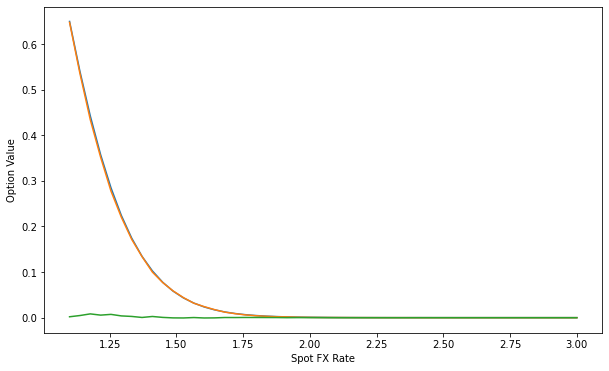

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.plot(spot_fx_rate, v, label = "Anal")
plt.plot(spot_fx_rate, v_mc, label = "MC")
plt.plot(spot_fx_rate, (v - v_mc)*1, label = "Diff")

plt.xlabel("Spot FX Rate")
plt.ylabel("Option Value");

Copyright (c) 2020, Dominic O'Kane 